<a href="https://colab.research.google.com/github/ManuChandana/AI-ML/blob/main/K_Means_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the CSV file
df = pd.read_csv("/content/housing.csv")

In [ ]:
# Explore the dataset
print("First five rows of the dataset:")
print(df.head())

print("\nSummary of dataset:")
print(df.info())

First five rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Summary of dataset:
<class 'pandas.core.fr

In [ ]:
# Preprocessing: Remove missing values and select numerical columns
df = df.dropna()
data = df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']].values


In [ ]:
# Normalize data for consistent scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# k-Means Clustering Implementation
def k_means(data, k, max_iters=100):
    # Initialize centroids randomly from data points
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Step 1: Assign clusters based on the closest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)  # Compute Euclidean distances
        clusters = np.argmin(distances, axis=1)

        # Step 2: Recalculate centroids as the mean of assigned points
        new_centroids = np.array([data[clusters == j].mean(axis=0) for j in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids


In [ ]:
# Run the k-Means algorithm
k = 4  # Number of clusters
clusters, centroids = k_means(data_scaled, k)

In [ ]:
# Add cluster labels to the dataset
df['Cluster'] = clusters

In [ ]:
# Assuming `data_scaled` is the scaled data and `clusters` are the cluster assignments

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Inertia
inertia = np.sum((data_scaled - centroids[clusters])**2)
print(f"Inertia: {inertia}")

# Calculate Silhouette Score
sil_score = silhouette_score(data_scaled, clusters)
print(f"Silhouette Score: {sil_score}")

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(data_scaled, clusters)
print(f"Davies-Bouldin Index: {db_score}")

# Calculate Calinski-Harabasz Score
ch_score = calinski_harabasz_score(data_scaled, clusters)
print(f"Calinski-Harabasz Score: {ch_score}")


Inertia: 52061.05836942567
Silhouette Score: 0.28108116656817445
Davies-Bouldin Index: 1.1587497237553617
Calinski-Harabasz Score: 9226.340670638854


In [ ]:
# Visualize Clusters in 2D using PCA
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

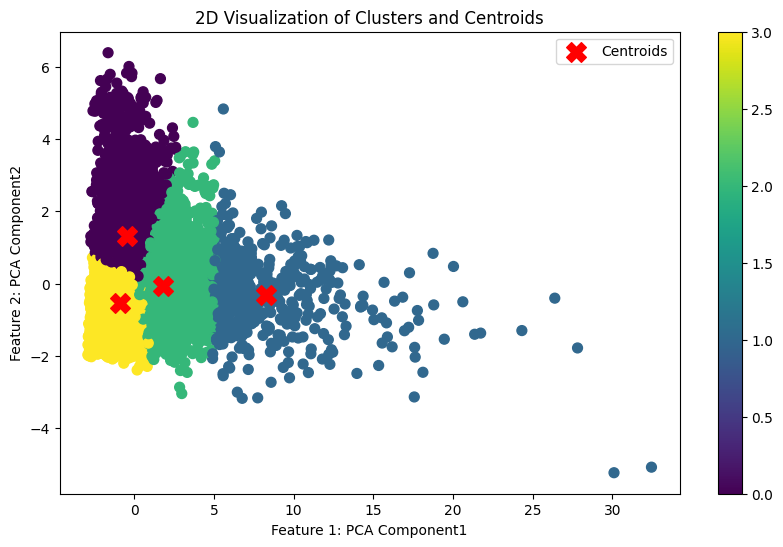

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=50)
centroid_pca = pca.transform(centroids)

plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.colorbar(scatter)
plt.xlabel('Feature 1: PCA Component1')
plt.ylabel('Feature 2: PCA Component2')
plt.title('2D Visualization of Clusters and Centroids')
plt.legend()
plt.show()
